# Introduction to pytorch models

## Introduction to autodiff

Load needed libraries
$\newcommand\p[1]{{\left(#1\right)}}$
$\newcommand\code[1]{\texttt{#1}}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

Here is a simple example of how to find the minimum of the function
$x\mapsto\p{x-3}^2$ using the autodiff functionality of Pytorch.

First initialize a tensor `x` and indicate that we want to store a
gradient on it.

In [4]:
x = torch.tensor([1.0], requires_grad=True)

Create an optimizer on parameters. Here we want to optimize w.r.t.
variable `x`:

In [5]:
optimizer = optim.SGD([x], lr=0.01)

Create a computational graph using parameters (here only `x`) and
potentially other tensors.

Here we only want to compute $\p{x-3}^2$ so we define:

In [6]:
y = (x - 3) ** 2

Back-propagating gradients for `y` down to `x`. Don't forget to
reset gradients before.

In [7]:
optimizer.zero_grad()
y.backward()

Use gradient on `x` to apply a one-step gradient descent.

In [8]:
optimizer.step()
x.grad
x

tensor([1.0400], requires_grad=True)

And last we iterate the whole process

In [9]:
it = 0
while it < 1000:
    loss = (x - 3) ** 2
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if it % 20 == 0:
        print('Iteration: %d, x: %f, loss: %f' % (it, x.item(), loss.item()))
    it += 1

Iteration: 0, x: 1.079200, loss: 3.841600
Iteration: 20, x: 1.717659, loss: 1.712203
Iteration: 40, x: 2.143898, loss: 0.763130
Iteration: 60, x: 2.428460, loss: 0.340127
Iteration: 80, x: 2.618435, loss: 0.151595
Iteration: 100, x: 2.745265, loss: 0.067566
Iteration: 120, x: 2.829937, loss: 0.030114
Iteration: 140, x: 2.886464, loss: 0.013422
Iteration: 160, x: 2.924203, loss: 0.005982
Iteration: 180, x: 2.949397, loss: 0.002666
Iteration: 200, x: 2.966217, loss: 0.001188
Iteration: 220, x: 2.977446, loss: 0.000530
Iteration: 240, x: 2.984942, loss: 0.000236
Iteration: 260, x: 2.989947, loss: 0.000105
Iteration: 280, x: 2.993289, loss: 0.000047
Iteration: 300, x: 2.995519, loss: 0.000021
Iteration: 320, x: 2.997009, loss: 0.000009
Iteration: 340, x: 2.998003, loss: 0.000004
Iteration: 360, x: 2.998667, loss: 0.000002
Iteration: 380, x: 2.999110, loss: 0.000001
Iteration: 400, x: 2.999406, loss: 0.000000
Iteration: 420, x: 2.999603, loss: 0.000000
Iteration: 440, x: 2.999735, loss: 0.0

## Differentiate the exponential

The exponential function can be approximated using its Taylor
expansion:
$
\exp\p{z}\approx\sum_{k=0}^{N}\frac{z^k}{k!}
$

First define `x`, the "parameter" and build a computational graph from
it to compute the exponential.

In [10]:
# <answer>
x = torch.tensor([1.0], requires_grad=True)
exp = 0
niter = 10
it = 0
fact = 1
while it < niter:
    exp += x ** it / fact
    it += 1
    fact *= it
# </answer>

Compute the gradient and verify that it is correct

In [11]:
# <answer>
exp.backward()
print(x.grad)
# </answer>

tensor([2.7183])


## Solving equations with Pytorch

Suppose we want to solve the following system of two equations
\\[$
e^{-e^{-(x_1 + x_2)}} = x_2 (1 + x_1^2)$
\\]
\\[
$x_1 \cos(x_2) + x_2 \sin(x_1) = 1/2$
\\]

Find a loss whose optimization leads to a solution of the system of
equations above.

In [12]:
# Define two functions
# <answer>
def f1(x1, x2):
    return torch.exp(-torch.exp(-(x1 + x2))) - x2 * (1 + x1 ** 2)


def f2(x1, x2):
    return x1 * torch.cos(x2) + x2 * torch.sin(x1) - 0.5

x1 = torch.tensor([0.0], requires_grad=True)
x2 = torch.tensor([0.0], requires_grad=True)
loss = f1(x1, x2) ** 2 + f2(x1, x2) ** 2
# </answer>

Use Pytorch autodiff to solve the system of equations

In [13]:
# <answer>
optimizer = optim.SGD([x1, x2], lr=0.01)

it = 0
while it < 1000:
    loss = f1(x1, x2) ** 2 + f2(x1, x2) ** 2
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if it % 20 == 0:
        print('Iteration: %d, x1: %f, x2: %f, loss: %f' % (it, x1.item(), x2.item(), loss.item()))
    it += 1

f1(x1, x2).item(), f2(x1, x2).item()
# </answer>

Iteration: 0, x1: 0.007293, x2: 0.004651, loss: 0.385335
Iteration: 20, x1: 0.134238, x2: 0.107664, loss: 0.250012
Iteration: 40, x1: 0.229074, x2: 0.214341, loss: 0.146439
Iteration: 60, x1: 0.294770, x2: 0.309024, loss: 0.078318
Iteration: 80, x1: 0.335219, x2: 0.384967, loss: 0.040020
Iteration: 100, x1: 0.356608, x2: 0.442270, loss: 0.020582
Iteration: 120, x1: 0.365716, x2: 0.484327, loss: 0.010968
Iteration: 140, x1: 0.368040, x2: 0.515040, loss: 0.006060
Iteration: 160, x1: 0.367179, x2: 0.537610, loss: 0.003429
Iteration: 180, x1: 0.365141, x2: 0.554350, loss: 0.001966
Iteration: 200, x1: 0.362903, x2: 0.566874, loss: 0.001134
Iteration: 220, x1: 0.360872, x2: 0.576303, loss: 0.000656
Iteration: 240, x1: 0.359175, x2: 0.583435, loss: 0.000380
Iteration: 260, x1: 0.357814, x2: 0.588844, loss: 0.000221
Iteration: 280, x1: 0.356749, x2: 0.592954, loss: 0.000128
Iteration: 300, x1: 0.355924, x2: 0.596081, loss: 0.000074
Iteration: 320, x1: 0.355290, x2: 0.598461, loss: 0.000043
Ite

(1.7881393432617188e-06, 7.152557373046875e-07)

## Linear least squares Pytorch implementation

Every model in Pytorch is implemented as a class that derives from
`nn.Module`. The two main methods to implement are:

- `__init__`: Declare needed building blocks to implement forward pass
- `forward`: Implement the forward pass from the input given as
  argument

In [14]:
import torch.nn as nn

class LinearLeastSquare(nn.Module):
    def __init__(self, input_size):
        super(LinearLeastSquare, self).__init__()

        # Declaring neural networks building blocks. Here we only need
        # a linear transform.
        # <answer>
        self.linear = nn.Linear(input_size, 1)
        # </answer>

    def forward(self, input):
        # Implementing forward pass. Return corresponding output for
        # this neural network.
        # <answer>
        return self.linear(input)
        # </answer>

## Synthetic data

We use the following linear model:

\\[
y = \langle\beta,x\rangle+\varepsilon
\\]

where \\(x\in\mathcal R^p\\) and \\(\varepsilon\sim\mathcal N(0, \sigma^2)\\).

In [15]:
import math
p = 512
N = 50000
X = torch.randn(N, p)
beta = torch.randn(p, 1) / math.sqrt(p)
y = torch.mm(X, beta) + 0.5 * torch.randn(N, 1)

## Preparing dataset to feed Pytorch model

In [16]:
from torch.utils.data import TensorDataset

# Gather data coming from Pytorch tensors using `TensorDataset`
# <answer>
dataset = TensorDataset(X, y)
# </answer>

In [17]:
from torch.utils.data import DataLoader
# Define `train_loader` that is an iterable on mini-batches using
# `DataLoader`
# <answer>
batch_size = 128
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
# </answer>

In [18]:
# Loss function to use
from torch.nn import MSELoss
# <answer>
loss_fn = MSELoss()
# </answer>

In [19]:
# Optimization algorithm
from torch.optim import SGD

# Instantiate model with `LinearLeastSquare` with the correct input
# size.
# <answer>
model = LinearLeastSquare(p)
# </answer>

In [20]:
# Use the stochastic gradient descent algorithm with a learning rate of
# 0.01 and a momentum of 0.9.
# <answer>
optimizer = SGD(model.parameters(), lr=0.01, momentum=.9)
# </answer>

## Learning loop

In [21]:
epochs = 10
losses = []
for i in range(epochs):
    for src, tgt in train_loader:
        # Forward pass
        # <answer>
        prd = model(src)
        # </answer>

        # Backpropagation on loss
        # <answer>
        loss = loss_fn(prd, tgt)
        optimizer.zero_grad()
        loss.backward()
        # </answer>

        # Gradient descent step
        # <answer>
        optimizer.step()
        # </answer>

        losses.append(loss.item())

    print(f"Epoch {i}/{epochs}: Last loss: {loss}")

Epoch 0/10: Last loss: 0.6113588213920593
Epoch 1/10: Last loss: 0.38930901885032654
Epoch 2/10: Last loss: 0.39413878321647644
Epoch 3/10: Last loss: 0.4637220501899719
Epoch 4/10: Last loss: 0.407325804233551
Epoch 5/10: Last loss: 0.3546220064163208
Epoch 6/10: Last loss: 0.3435727059841156
Epoch 7/10: Last loss: 0.42435112595558167
Epoch 8/10: Last loss: 0.3953465223312378
Epoch 9/10: Last loss: 0.4599045217037201


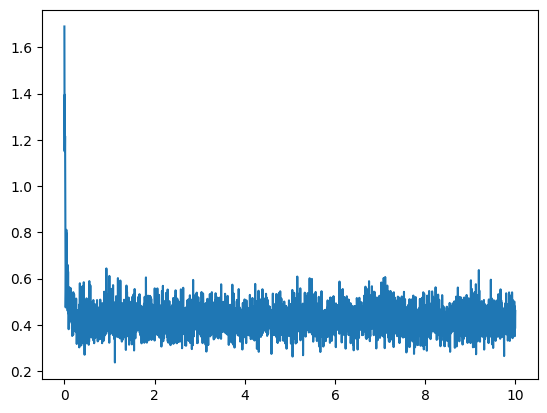

In [22]:
x = np.arange(len(losses)) / len(losses) * epochs
plt.plot(x, losses)

From the model what should be the minimum MSE?
<answer>
Noise distribution is \\(\varepsilon\sim\matcal\p{0, 0.25}\\) so the
minimum MSE should be \\(\mathcal E\p{\epsilon^2}=0.25\\).
</answer>

## Learning loop with scheduler

From convex optimization theory the learning rate should be decreasing
toward 0. To have something approaching we use a scheduler that is
updating the learning rate every epoch.

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR

# Define a scheduler
# <answer>
model = LinearLeastSquare(p)
optimizer = SGD(model.parameters(), lr=0.01, momentum=.9)
scheduler = MultiStepLR(optimizer, milestones=[3, 6], gamma=0.2)
# </answer>

In [ ]:
# Implement the learning loop with a scheduler
# <answer>
epochs = 10
losses = []
for i in range(epochs):
    for src, tgt in train_loader:
        # Forward pass
        prd = model(src)

        # Backpropagation on loss
        loss = loss_fn(prd, tgt)
        optimizer.zero_grad()
        loss.backward()

        # Gradient descent step
        optimizer.step()

        losses.append(loss.item())

    # Scheduler step
    scheduler.step()

    print(f"Epoch {i}/{epochs}: Last loss: {loss}")

x = np.arange(len(losses)) / len(losses) * epochs
plt.plot(x, losses)
# </answer>

## Multi-layer perceptron

Implement a multi-layer perceptron described by the following
function:
\\[
f\p{x,\beta}=W_3\sigma\p{W_2\sigma{W_1 x}}
\\]
where \\(\sigma\p{x}=\max\p{x, 0}\\)

In [ ]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MultiLayerPerceptron, self).__init__()

        # Define hyperparameters of neural network and building blocks
        # <answer>
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size

        self.fc1 = nn.Linear(self.input_size, self.hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(self.hidden_size1, self.hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(self.hidden_size2, self.output_size)
        # </answer>

    def forward(self, x):
        # Implement forward pass
        # <answer>
        hidden = self.fc1(x)
        relu1 = self.relu1(hidden)
        hidden2 = self.fc2(relu1)
        relu2 = self.relu2(hidden2)
        output = self.fc3(relu2)
        return output
        # </answer>

## Synthetic 2-dimensional spiral dataset

In [ ]:
n_classes = 3
n_loops = 2
n_samples = 1500

def spirals(n_classes=3, n_samples=1500, n_loops=2):
    klass = np.random.choice(n_classes, n_samples)
    radius = np.random.rand(n_samples)
    theta = klass * 2 * math.pi / n_classes + radius * 2 * math.pi * n_loops
    radius = radius + 0.05 * np.random.randn(n_samples)
    return np.column_stack((radius * np.cos(theta), radius * np.sin(theta))).astype("float32"), klass

X_, y_ = spirals(n_samples=n_samples, n_classes=n_classes, n_loops=n_loops)
plt.scatter(X_[:, 0], X_[:, 1], c=y_)

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss

X = torch.from_numpy(X_)
y = torch.from_numpy(y_)
dataset = TensorDataset(X, y)
batch_size = 32
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
loss_fn = CrossEntropyLoss()

In [ ]:
X_, y_ = spirals(n_samples=1000, n_classes=n_classes, n_loops=n_loops)
X = torch.from_numpy(X_)
y = torch.from_numpy(y_)
test_set = TensorDataset(X, y)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [ ]:
model = MultiLayerPerceptron(2, 20, 20, n_classes)
optimizer = SGD(model.parameters(), lr=0.05)
# optimizer = Adam(model.parameters())

In [ ]:
import copy

epochs = 1000
losses = []
models = []
for i in range(epochs):
    for src, tgt in train_loader:
        # <answer>
        prd = model(src)
        loss = loss_fn(prd, tgt)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        # </answer>

    # Accuracy on the test set
    acc = 0.
    for src, tgt in test_loader:
        prd = model(src).detach().argmax(dim=1)
        acc += sum(prd == tgt).item()

    acc /= len(test_set)
    print(f"Epoch {i}/{epochs}: Test accuracy: {acc}")

    models.append(copy.deepcopy(model))

In [ ]:
def get_image_data(model, colors, xs, ys):
    """Return color image of size H*W*4."""

    # Generate points in grid
    xx, yy = np.meshgrid(xs, ys)
    points = np.column_stack((xx.ravel(), yy.ravel())).astype("float32")
    points = torch.from_numpy(points)

    # Predict class probability on points
    prd = model(points).detach()
    prd = torch.nn.functional.softmax(prd, dim=1)

    # Build a color image from colors
    colors = torch.from_numpy(colors)
    img = torch.mm(prd, colors).numpy()
    img = img.reshape((ynum, xnum, 4))
    img = np.minimum(img, 1)

    return img

fig, ax = plt.subplots()

# Get n_classes colors in RGBa form
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
import matplotlib as mpl
colors = mpl.colors.to_rgba_array(colors)[:n_classes, :4].astype("float32")

# Draw scatter plot of test set using colors
ax.scatter(X[:, 0], X[:, 1], c=colors[y])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
xnum, ynum = (int(i) for i in fig.dpi * fig.get_size_inches())

# Create discretization
xs = np.linspace(xmin, xmax, xnum)
ys = np.linspace(ymin, ymax, ynum)
img = get_image_data(model, colors, xs, ys)

ax.imshow(img, extent=[xmin, xmax, ymin, ymax], origin="lower", alpha=.7)

In [ ]:
# <answer>
def plot_decision_region(ax, model):
    # Build input
    fig = ax.get_figure()
    xnum, ynum = (int(i) for i in fig.dpi * fig.get_size_inches())
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, xnum), np.linspace(ymin, ymax, ynum))
    points = np.column_stack((xx.ravel(), yy.ravel())).astype("float32")

    points = torch.from_numpy(points)
    prd = model(points).detach()

    prd = torch.nn.functional.softmax(prd, dim=1)

    prop_cycle = plt.rcParams["axes.prop_cycle"]
    colors = prop_cycle.by_key()["color"]
    import matplotlib as mpl
    colors = torch.from_numpy(mpl.colors.to_rgba_array(colors)[:prd.size(1), :3].astype("float32"))
    img = torch.mm(prd, colors).numpy()

    img = img.reshape((ynum, xnum, 3))

    ax.imshow(img, extent=[xmin, xmax, ymin, ymax], zorder=0, origin="lower", alpha=.7)
    return img


import matplotlib.animation as animation
import matplotlib as mpl

fig, ax = plt.subplots()
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = np.array(prop_cycle.by_key()["color"])[:n_classes]
colors_rgb = mpl.colors.to_rgba_array(colors).astype("float32")
mean_color = np.minimum(np.mean(colors_rgb, axis=0), 1)

X, y = spirals(n_samples=900, n_loops=n_loops, n_classes=n_classes)
ax.scatter(X[:, 0], X[:, 1], c=colors[y])
xnum, ynum = (int(i) for i in fig.dpi * fig.get_size_inches())
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
xs = np.linspace(xmin, xmax, xnum)
ys = np.linspace(ymin, ymax, ynum)

im = ax.imshow(
    np.tile(mean_color, (ynum, xnum, 1)),
    extent=[xmin, xmax, ymin, ymax],
    origin="lower",
    alpha=0.7,
)

def animate(i):
    model = models[i]
    data = get_image_data(model, colors_rgb, xs, ys)

    im.set_data(data)
    return [im]

ani = animation.FuncAnimation(
    fig=fig,
    func=animate,
    frames=range(len(models)),
    interval=50,
    blit=True
)

ani.save('test_anim.mp4', fps=50)




fig, ax = plt.subplots()
X, y = spirals(n_samples=900, n_loops=n_loops, n_classes=n_classes)

prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = np.array(prop_cycle.by_key()["color"])

ax.scatter(X[:, 0], X[:, 1], c=colors[y])
img = plot_decision_region(ax, model)
plt.show()
# </answer>